In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Face_Detection
!unrar x "train.rar" "/content/drive/MyDrive/Face_Detection/"

/content/drive/MyDrive/Face_Detection

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from train.rar


Would you like to replace the existing file /content/drive/MyDrive/Face_Detection/train/images/img_1_0_jpg.rf.b1795c7c2f7f4a679715ffc1f439fe6f.jpg
 29121 bytes, modified on 2024-03-19 13:00
with a new one
 29121 bytes, modified on 2024-03-19 13:00

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
#version yolov8
%cd /content
!gdown --id 1dL0niKPx3ylM9qVfvRiTFb4vcsfyQ_0T
!gdown --id 1AMy69iovOLiTUwyi40PNUn1riyl7HWTP
!gdown --id 1Kn9_EBWI7Vyo-xg4ijc83xqruYgDqOyD

/content
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dL0niKPx3ylM9qVfvRiTFb4vcsfyQ_0T
To: /content/yolov8s.pt
100% 22.6M/22.6M [00:00<00:00, 50.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1AMy69iovOLiTUwyi40PNUn1riyl7HWTP
From (redirected): https://drive.google.com/uc?id=1AMy69iovOLiTUwyi40PNUn1riyl7HWTP&confirm=t&uuid=3ff312d8-56c8-480e-8eda-d7600f140430
To: /content/train.rar
100% 53.2M/53.2M [00:00<00:00, 89.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in versio

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
# Create training yaml file
%cd /content
!rm mydataset.yaml # nếu có file thì xóa
!echo 'train: /content/drive/MyDrive/Face_Detection/train/images' >> mydataset.yaml
!echo 'val: /content/drive/MyDrive/Face_Detection/train/images' >> mydataset.yaml
!echo 'nc: 2' >> mydataset.yaml
!echo "names: ['Hai','Thu']" >> mydataset.yaml

/content
rm: cannot remove 'mydataset.yaml': No such file or directory


In [ ]:
%cd /content
!yolo task=detect mode=train model=yolov8n.pt data=mydataset.yaml epochs=250 imgsz=640 batch=16

/content
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=mydataset.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

In [ ]:
from ultralytics import YOLO
#Load file weights
path_weights = "/content/drive/MyDrive/Face_Detection/runs/detect/train/weights/best.pt"
model = YOLO(f"{path_weights}")

#Predict image
path_img = "/content/drive/MyDrive/Face_Detection/train/images/img_1_91_jpg.rf.813ed397b3d3888fc4117882085cb767.jpg"
results = model.predict(f"{path_img}")


image 1/1 /content/drive/MyDrive/Face_Detection/train/images/img_1_91_jpg.rf.813ed397b3d3888fc4117882085cb767.jpg: 640x640 1 Thu, 7.4ms
Speed: 5.6ms preprocess, 7.4ms inference, 767.6ms postprocess per image at shape (1, 3, 640, 640)


### 1. Check Acc and Boudingbox

In [ ]:
results = results[0]

In [ ]:
for box in results.boxes:
  class_id = results.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: Thu
Coordinates: [125, 252, 509, 499]
Probability: 0.94
---


### 2. Show Image

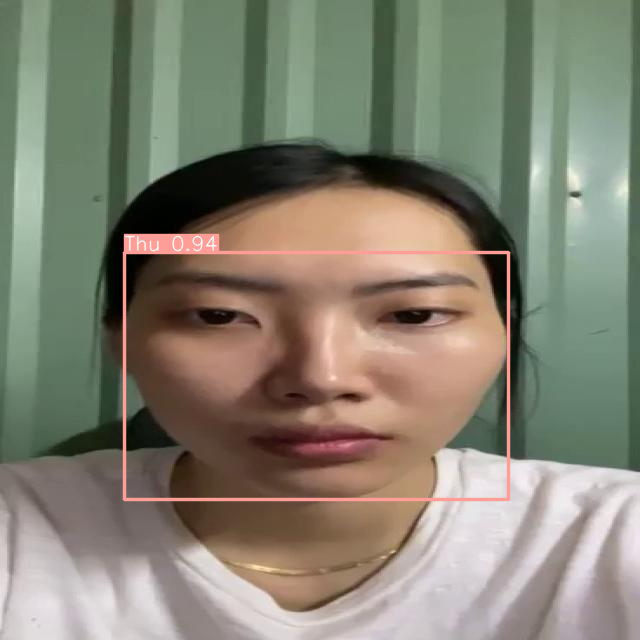

In [ ]:
from PIL import Image

Image.fromarray(results.plot()[:,:,::-1])

### Detection and Export by Video

In [ ]:
!yolo detect predict model="/content/drive/MyDrive/Face_Detection/runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4"

Ultralytics YOLOv8.1.35 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/114) /content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4: 640x384 1 Hai, 97.7ms
video 1/1 (frame 2/114) /content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4: 640x384 1 Hai, 7.4ms
video 1/1 (frame 3/114) /content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4: 640x384 1 Hai, 6.4ms
video 1/1 (frame 4/114) /content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4: 640x384 1 Hai, 6.0ms
video 1/1 (frame 5/114) /content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4: 640x384 1 Hai, 6.3ms
video 1/1 (frame 6/114) /content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4: 640x384 1 Hai, 5.9ms
video 1/1 (frame 7/114) /content/drive/MyDrive/Face_Detection/test/3829249498855686133.mp4: 640x384 1 Hai, 6.4ms
video 1/1 (frame 8/114) /content/drive/My